**Things to be considered.**

* Use any 2 classification algorithms and try to predict the quality of water. 
* The project must contain all the classification evaluation metrics we discussed with an explanation of what each metric means. 
* Please do necessary preprocessing if needed.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("./data/water_potability.csv")
data.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

**Variable Description**
* pH : Acidity of water.
* Hardness: Hardness of water.
* Solids : Solids dissolved in water.
* Chloramines: Chloramines dissolved in water.
* Sulfate : Sulfate contained in water.
* Conductivity: Conductivity of electric of water.
* Organic Carbon : Organic Carbon dissolved in water.
* Trihalomethanes: Trihalomethanes are chemicals that may be found in water.
* Turbidity: Measure of light emitting.
* Potability: Classification of water if it is healthy or not. 1 is healthy, 0 is unhealthy.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


### All our datas are in numberic form.

In [5]:
data.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792304       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

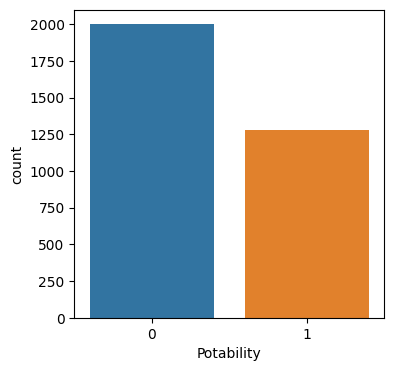

In [3]:
plt.figure(figsize = (4, 4))
sns.countplot(data = data, x = "Potability");

## Checking the distribution of each variable.

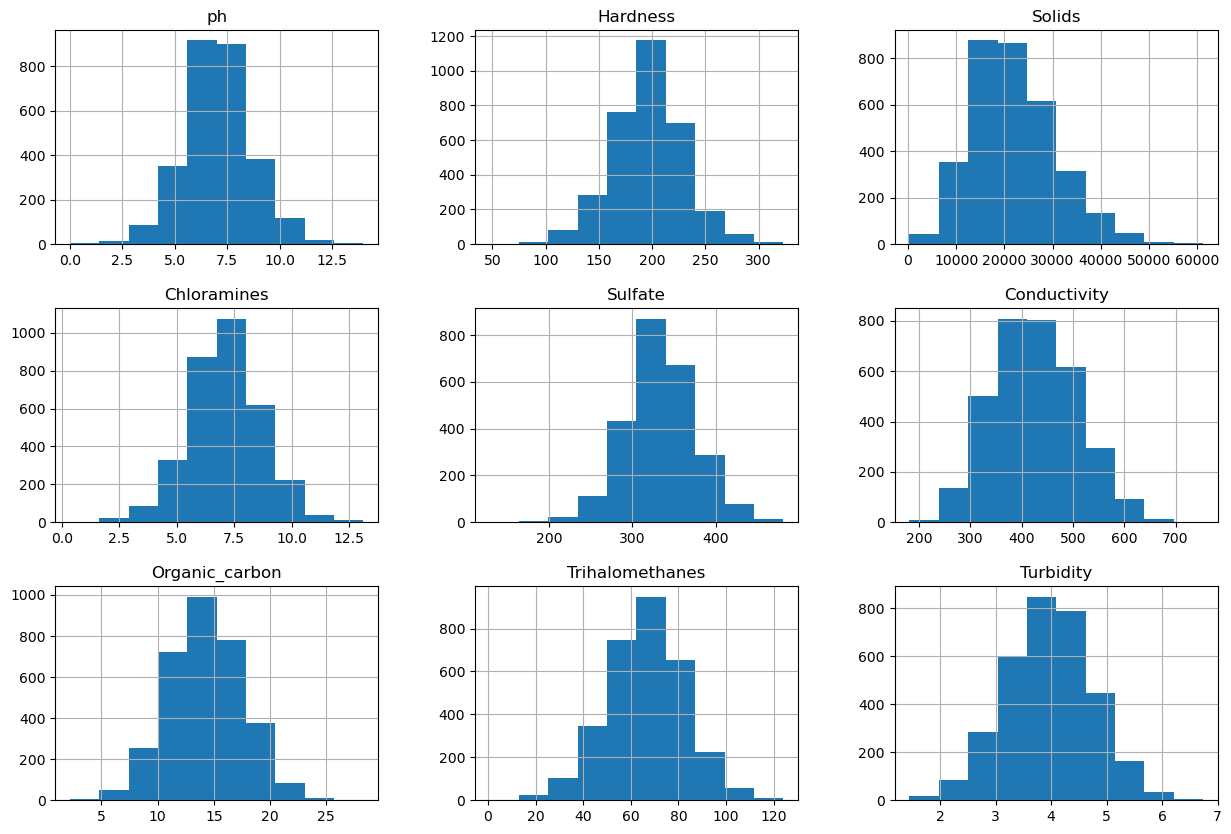

In [10]:
# Data visualization using matplotlib histograms.
plt_data = data.iloc[:, :-1]
plt_data.hist(figsize=(15,10));

# Analyzing Data Distribution.

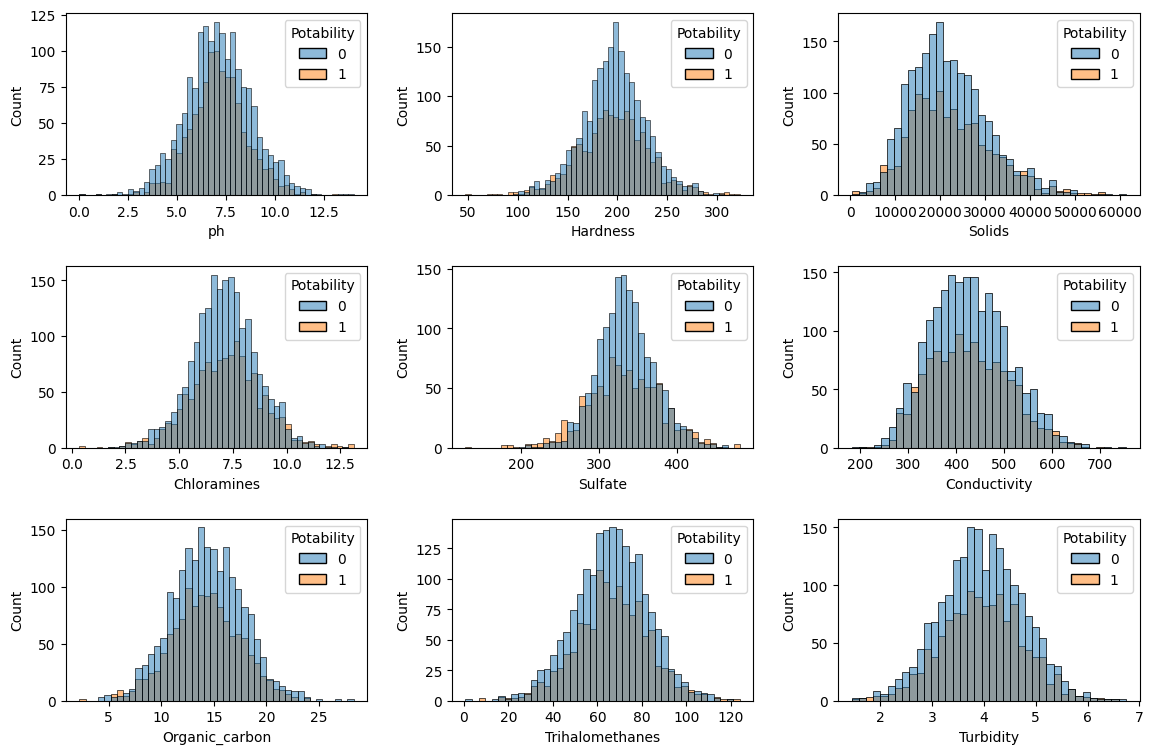

In [7]:
fig, axes = plt.subplots(3, 3, figsize=(12, 8))
fig.tight_layout(pad=3.0)


ax = axes.flatten()

for i, column in enumerate(data.columns[:-1]):
    sns.histplot(data=data, x=data[column], ax=ax[i], hue="Potability")

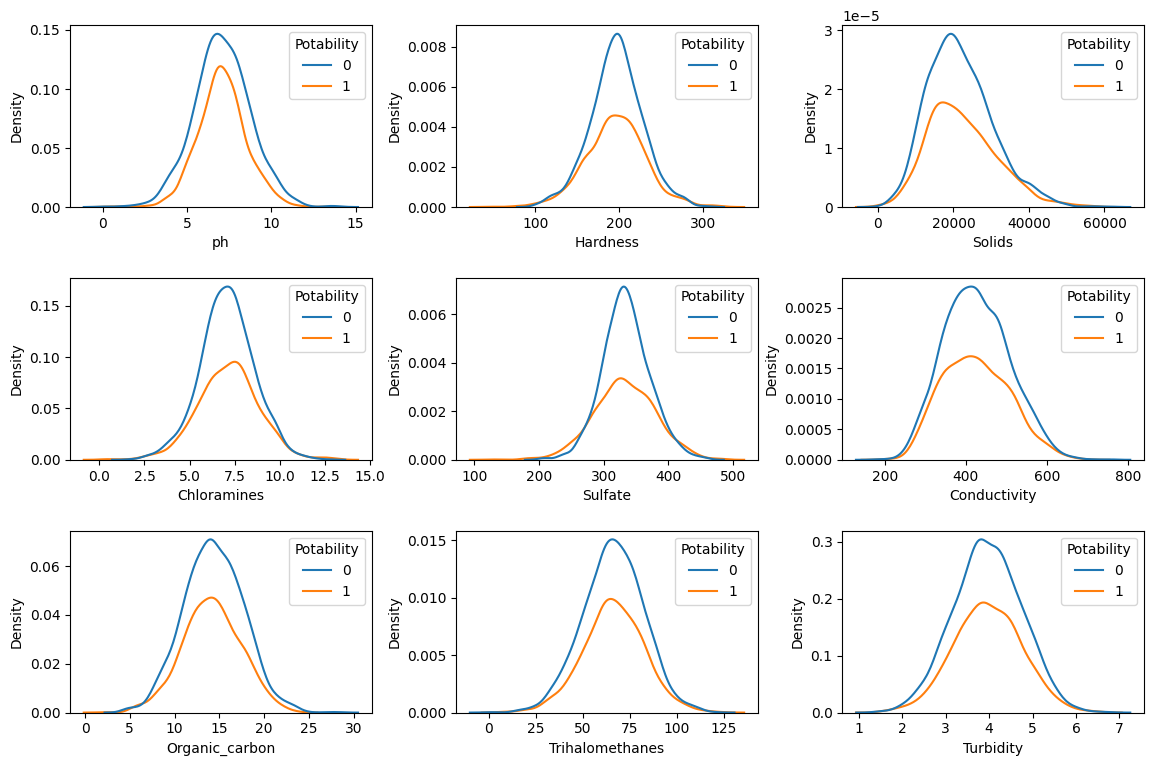

In [12]:
fig, axes = plt.subplots(3, 3, figsize=(12, 8))

fig.tight_layout(pad=3)

axes = axes.flatten()

for i, column in enumerate(data.columns[:-1]):
    sns.kdeplot(data = data, x = column, hue = 'Potability', ax = axes[i])
    axes[i].xlabel=False

### Checking for outliers with boxplot

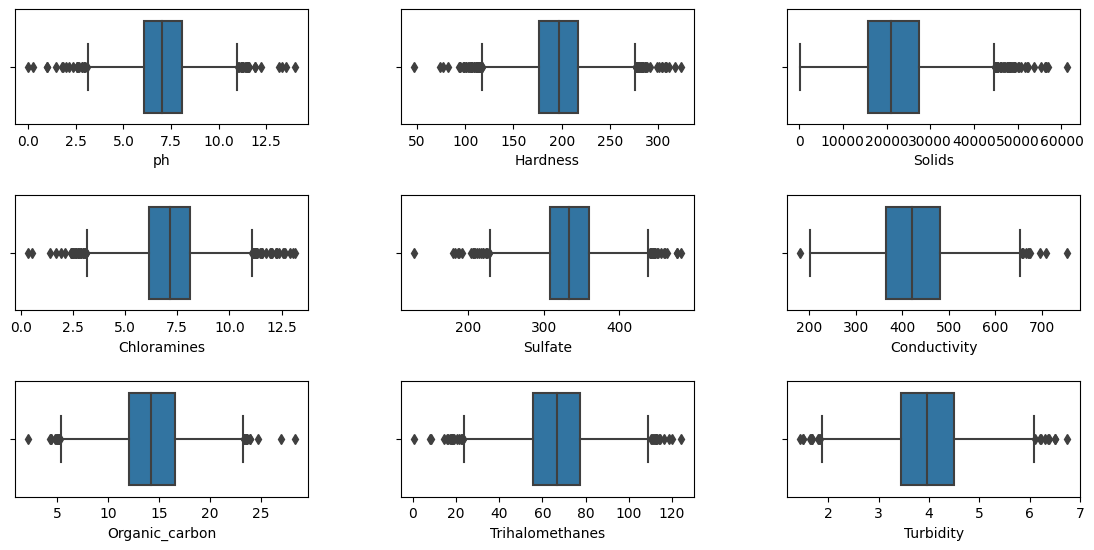

In [11]:
fig, axes = plt.subplots(3, 3, figsize=(12, 6))
fig.tight_layout(pad=3.0)


ax = axes.flatten()

for i, column in enumerate(data.columns[:-1]):
    sns.boxplot(data=data, x=data[column], ax=ax[i])

# Dealing with missing values.

In [13]:
data.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity   
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654  \
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [14]:
data.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792304       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

In [14]:
data.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

### From above analysis columns `['ph', 'Sulfate', 'Trihalomethanes']` has some missing values.

**Since the datas are in normal distribution, we're going to fill the missing values with median value.**

In [5]:
missing_values_columns = ['ph', 'Sulfate', 'Trihalomethanes']
for column in missing_values_columns:
    data[column].fillna(data[column].median(), inplace=True)

In [6]:
# Checking the dataset whether the null values are filled or not.
data.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

### Finding correlation between features.

In [17]:
corr_matrix = data.corr()

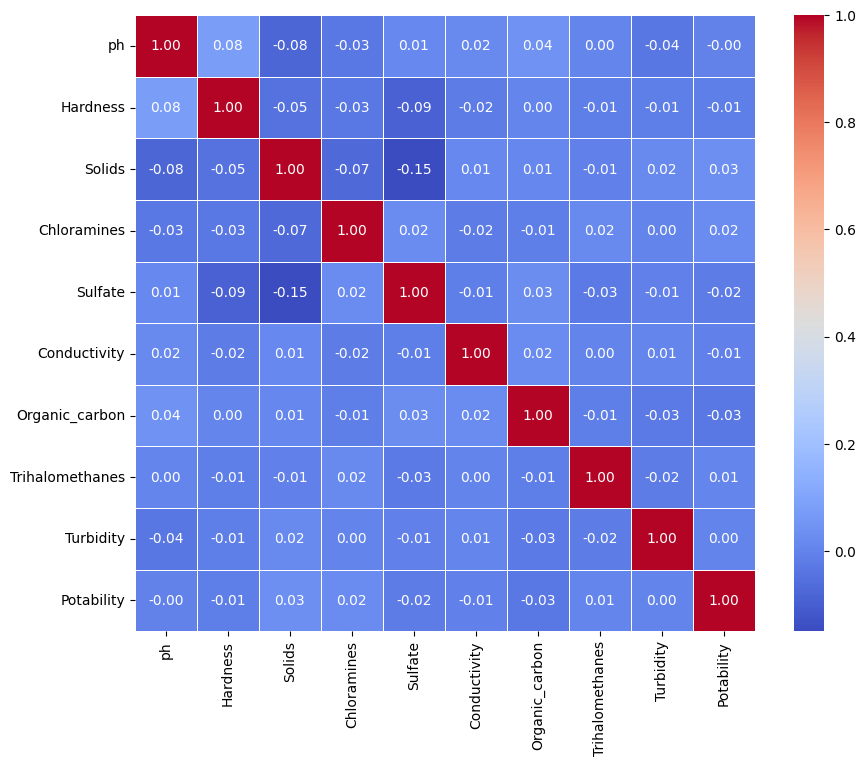

In [18]:
# Creating heatmap from correlation matrix.
plt.figure(figsize = (10, 8))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True, linewidths=0.5, fmt=".2f");

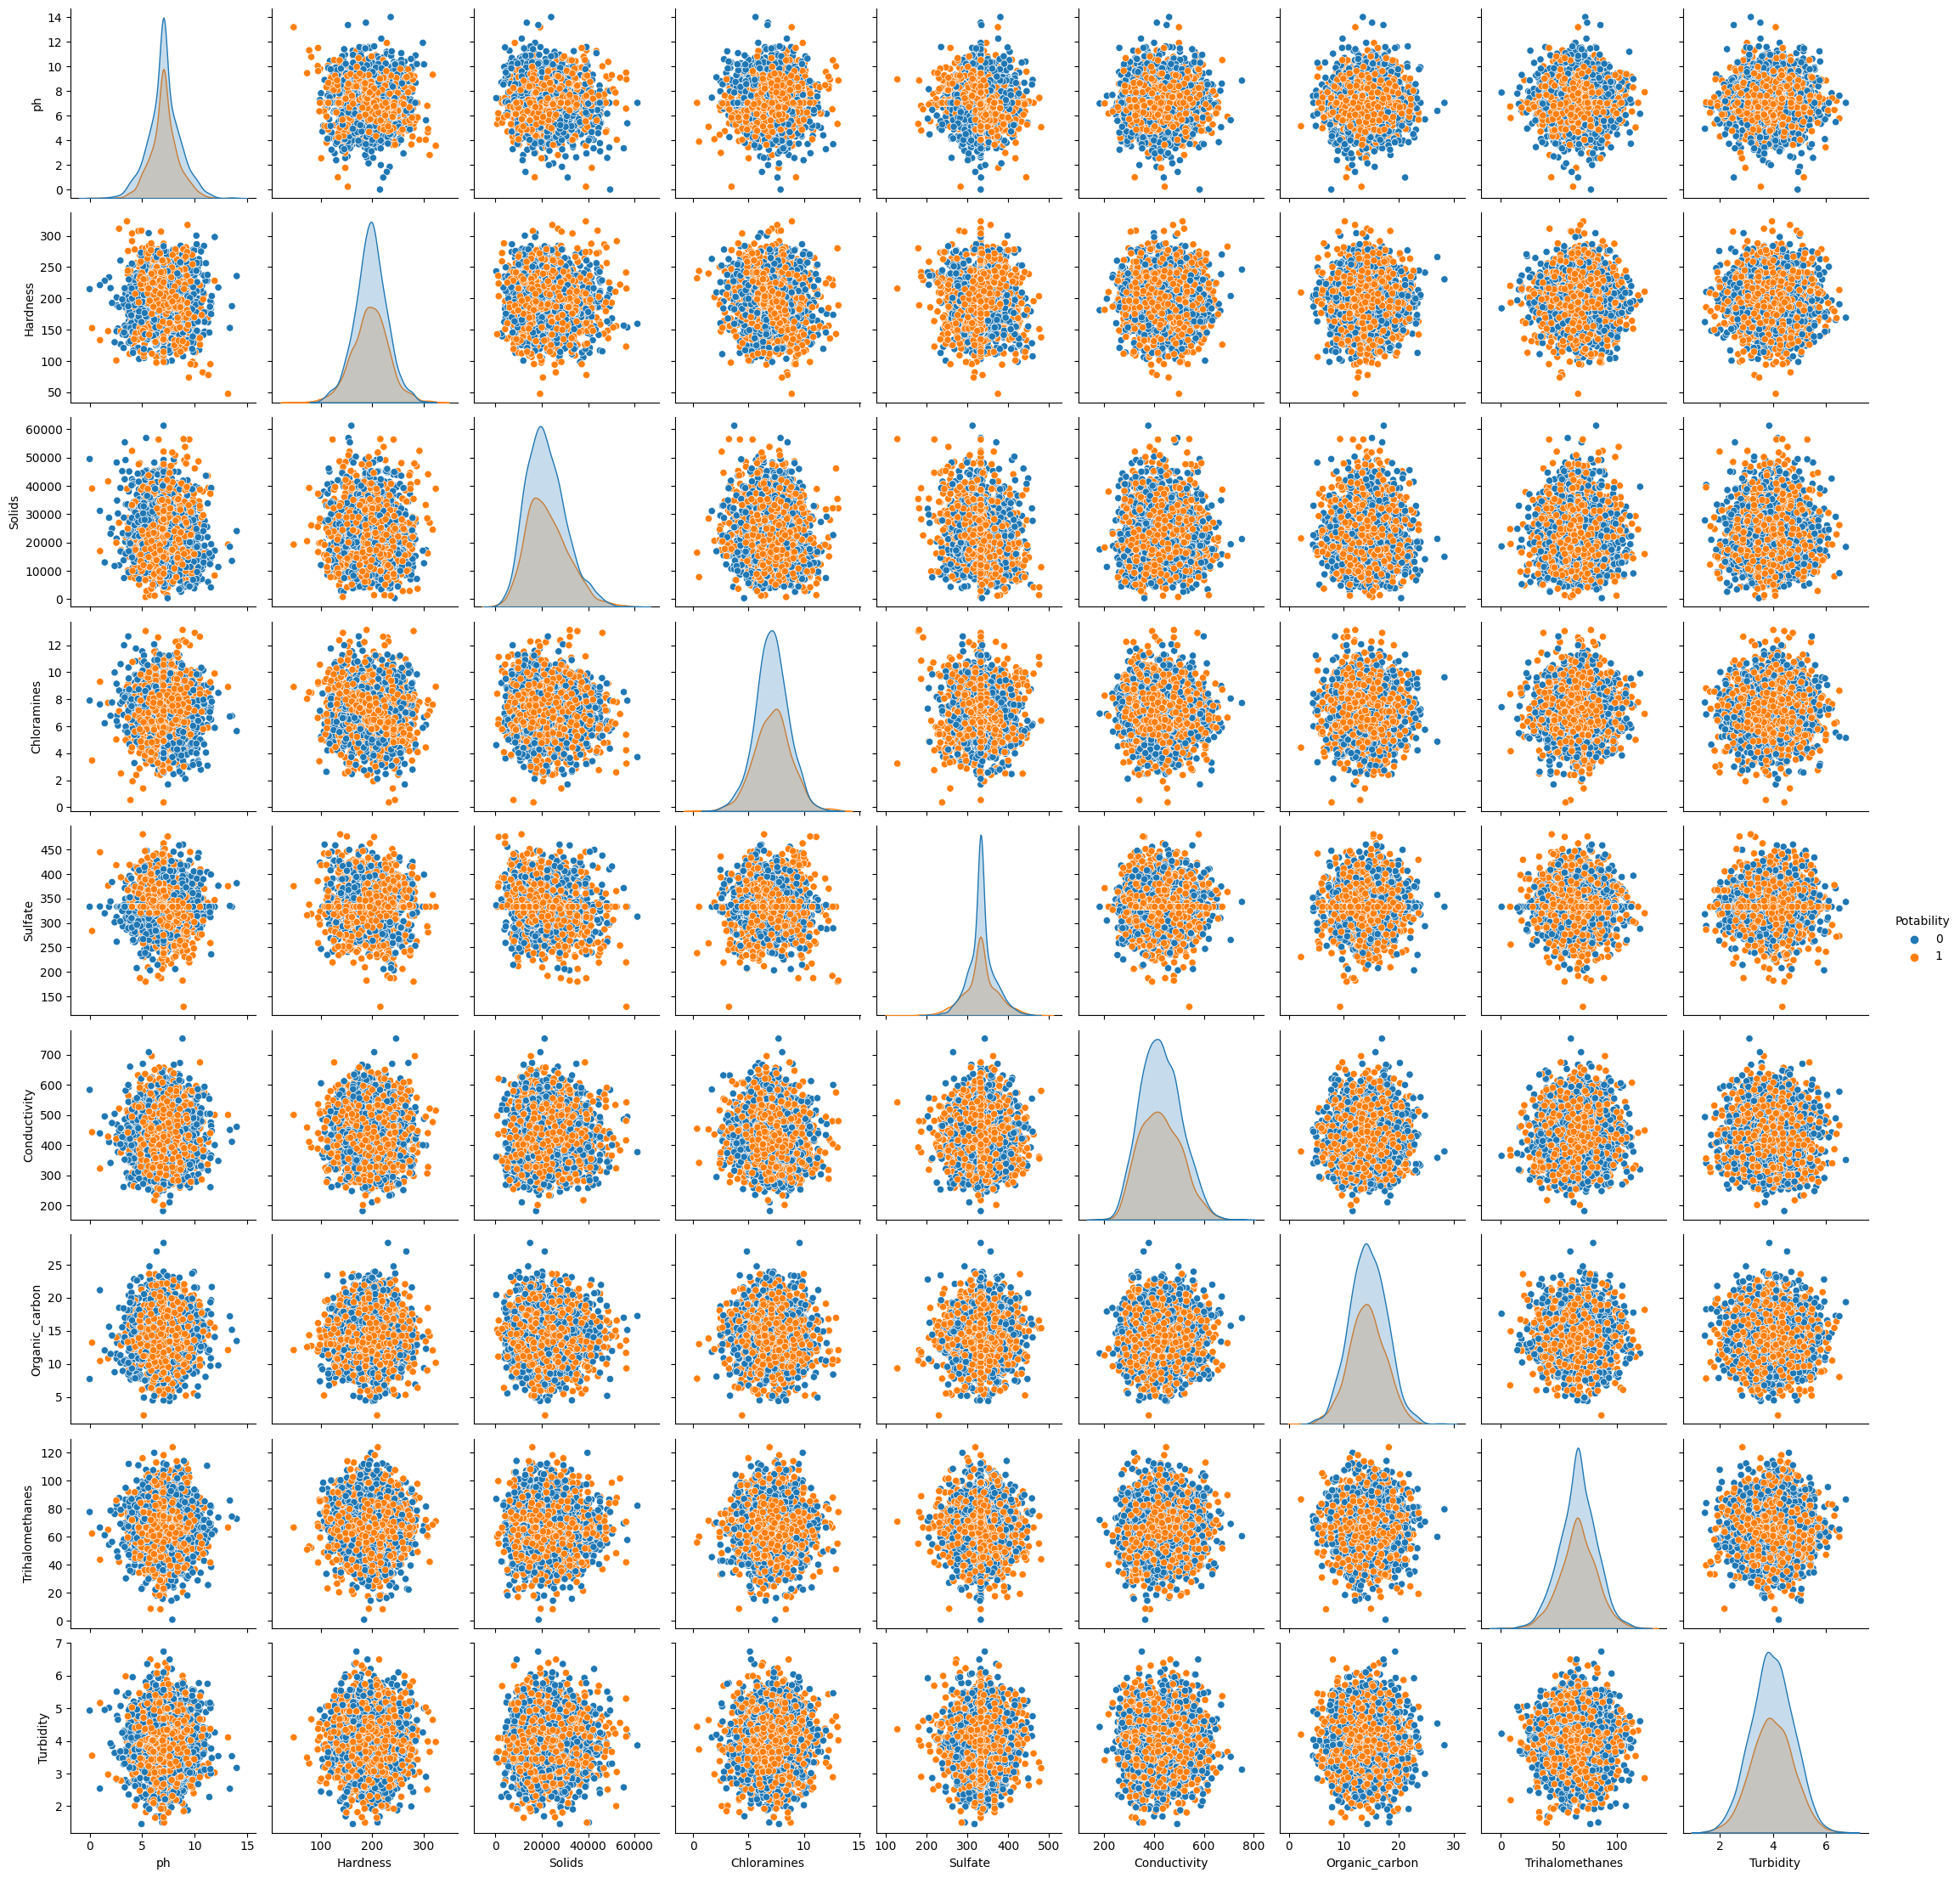

In [19]:
sns.pairplot(data, hue='Potability');

# Preparing data for classification.

In [27]:
# Creating second dataframe
null_droped_df = pd.read_csv("./data/water_potability.csv")
null_droped_df.shape

(3276, 10)

In [28]:
null_droped_df.head(3)

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0

In [29]:
null_droped_df.dropna(inplace=True)
print(null_droped_df.shape)

(2011, 10)


## We had created two different dataframe.
1. ****data**** : Dataframe filling missing values with the median.
2. ****null_droped_df**** : Dataframe removing rows having missing values.

## Data preparation for train and test sets.

In [72]:
# Splitting data into training and test section.
from sklearn.model_selection import train_test_split

np.random.seed(80)

# Data preparation of the data set which null values have been filled with median.
X = data.drop("Potability", axis=1)
y = data['Potability']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Preparing data for the dataset where the null rows had been droped.
A = null_droped_df.drop("Potability", axis=1)
b = null_droped_df['Potability']
A_train, A_test, b_train, b_test = train_test_split(A, b, test_size=0.2)

### Classification with Random Forest Classifier model.

In [98]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(80)

clf = RandomForestClassifier()

# Training model with the data from the dataframe where missing values are filled using median.
clf.fit(X_train, y_train)

# Training model with the data from the dataframe where null values rows are deleted
clf.fit(A_train, b_train)

print(f"Accuracy Score on dataset with missing value as median: {clf.score(X_test, y_test)}")
print(f"Accuracy Score on dataset droping missing value: {clf.score(A_test, b_test)}")

Accuracy Score on dataset with missing value as median: 0.8246951219512195
Accuracy Score on dataset droping missing value: 0.6650124069478908


### Using Random Forest classifier model:
**From the above accuracy score we can say that a model can predict more accurately if a dataset missing values are filled with median rather than dropping them.**

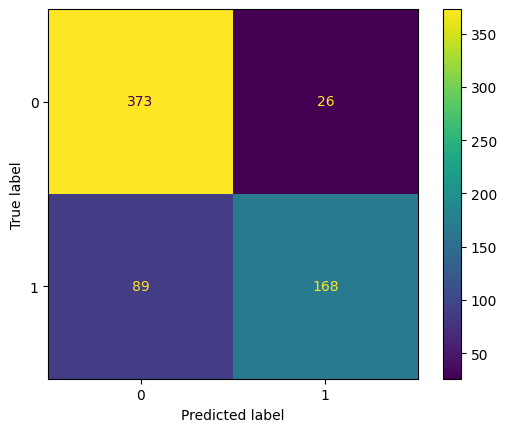

In [99]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test);

In [100]:
# Other evaluation metrics:
from sklearn.metrics import classification_report
y_preds = clf.predict(X_test)

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87       399
           1       0.87      0.65      0.75       257

    accuracy                           0.82       656
   macro avg       0.84      0.79      0.81       656
weighted avg       0.83      0.82      0.82       656



In [73]:
#Save a model.
import pickle
pickle.dump(rfc_model, open("random_forest_model_83.pk1", "wb"))

In [ ]:
# Loading model
# import pickle
loaded_model = pickle.load(open("random_forest_model_83.pk1", "rb"))
loaded_model.score(X_test, y_test)

### Using KNeighbors classifier model:

In [103]:
from sklearn.neighbors import KNeighborsClassifier

np.random.seed(80)
clf = KNeighborsClassifier()

# Training model with the data from the dataframe where missing values are filled using median.
clf.fit(X_train, y_train)

# Training model with the data from the dataframe where null values rows are deleted
clf.fit(A_train, b_train)

print(f"Accuracy Score on dataset with missing value as median: {clf.score(X_test, y_test)}")
print(f"Accuracy Score on dataset droping missing value: {clf.score(A_test, b_test)}")

Accuracy Score on dataset with missing value as median: 0.6585365853658537
Accuracy Score on dataset droping missing value: 0.533498759305211


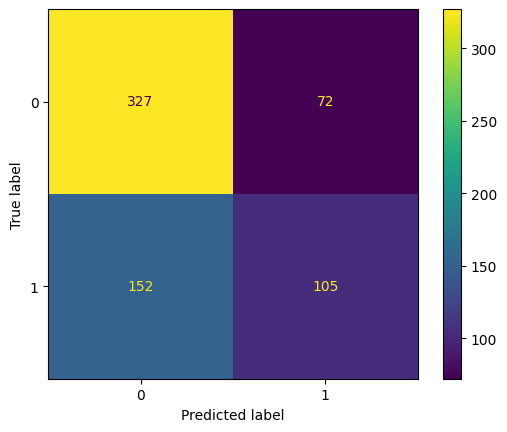

In [104]:
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test);

In [105]:
y_preds = clf.predict(X_test)
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.68      0.82      0.74       399
           1       0.59      0.41      0.48       257

    accuracy                           0.66       656
   macro avg       0.64      0.61      0.61       656
weighted avg       0.65      0.66      0.64       656



## Analyzing with different models:

In [106]:
# Using different models.
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier

In [107]:
def use_multiple_model(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models. Returns accuracy score of each given models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : testing labels
    """
    # Creating a dictionary to keep model scores
    model_scores = {}
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores.
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [108]:
#Defining models as dictionary.
np.random.seed(80)

models = {"Linear Regression": LinearRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier(),
          "SVC": SVC(),
          "Decision Tree": DecisionTreeClassifier(),
          "LinearSVC": LinearSVC()}

model_scores = use_multiple_model(models, X_train, X_test, y_train, y_test)
model_scores

C:\Users\Raju\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


{'Linear Regression': 0.0016541791822739516,
 'KNN': 0.5457317073170732,
 'Random Forest': 0.6676829268292683,
 'SVC': 0.6082317073170732,
 'Decision Tree': 0.5655487804878049,
 'LinearSVC': 0.600609756097561}

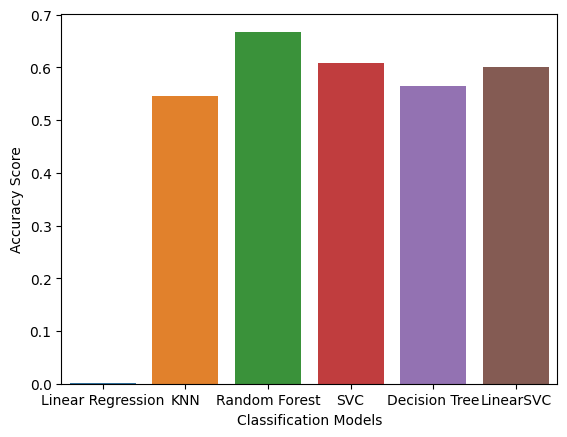

In [109]:
sns.barplot(y= pd.Series(model_scores.values()), x = pd.Series(model_scores.keys()))
plt.xlabel("Classification Models")
plt.ylabel("Accuracy Score");

### From above accuracy score comparision we can consider Random forest model as a best option for our dataset.

In [78]:
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).T
df_report

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


precision    recall  f1-score     support
0              0.629573  1.000000  0.772685  413.000000
1              0.000000  0.000000  0.000000  243.000000
accuracy       0.629573  0.629573  0.629573    0.629573
macro avg      0.314787  0.500000  0.386342  656.000000
weighted avg   0.396362  0.629573  0.486462  656.000000

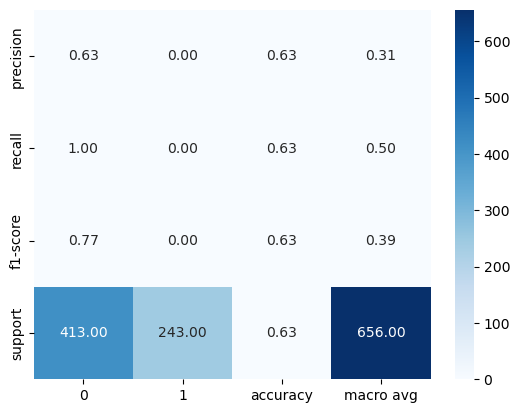

In [79]:
sns.heatmap(df_report.iloc[:-1, :].T, annot=True, cmap="Blues", fmt=".2f");

## End of Project-2.